NAMA   : MUHAMMAD FAIZAL ALKINDI

NIM    : 5312422002

In [ ]:
%pylab inline
import sk_dsp_comm.sigsys as ss
import sk_dsp_comm.fir_design_helper as fir_d
import sk_dsp_comm.iir_design_helper as iir_d
import sk_dsp_comm.multirate_helper as mrh
import scipy.signal as signal
from IPython.display import Audio, display
from IPython.display import Image, SVG

In [ ]:
%config InlineBackend.figure_formats=['svg'] # SVG inline viewing

# **Design Examples**

# **Contoh 1: Lowpass dengan $f_s = 1$ Hz**
Untuk filter dengan 31 tap ini, kita memilih frekuensi cutoff menjadi $F_c = F_s/8$, atau dalam bentuk terormalisasi $f_c = 1/8$.

In [ ]:
b_k = fir_d.firwin_kaiser_lpf(1/8,1/6,50,1.0)
b_r = fir_d.fir_remez_lpf(1/8,1/6,0.2,50,1.0)

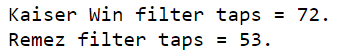

In [ ]:
fir_d.freqz_resp_list([b_k,b_r],[[1],[1]],'dB',fs=1)
ylim([-80,5])
title(r'Kaiser vs Equal Ripple Lowpass')
ylabel(r'Filter Gain (dB)')
xlabel(r'Frequency in kHz')
legend((r'Kaiser: %d taps' % len(b_k),r'Remez: %d taps' % len(b_r)),loc='best')
grid();

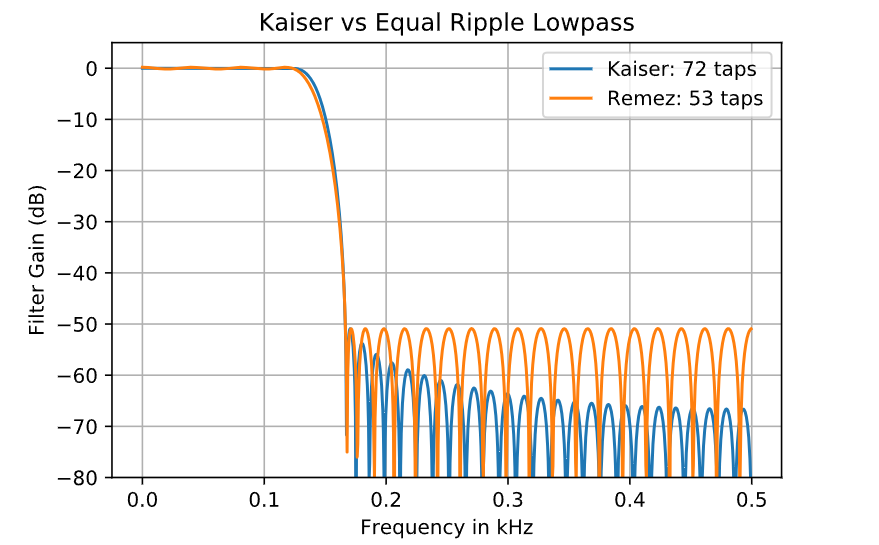

Gambar diatas menunjukkan perbandingan respons frekuensi dari dua jenis filter lowpass digital: filter Kaiser dan filter Equal Ripple (Remez). Grafik menunjukkan "Filter gain" dalam dB (decibel) terhadap "Frequency in kHz" (frekuensi dalam kiloHertz).

**1. Kurva Oranye:** Mewakili filter Kaiser dengan 72 taps. Grafik menunjukkan bahwa filter ini memberikan perlambatan yang sangat mulus dan stabil terhadap frekuensi, dengan peredaan yang kuat mulai dari sekitar 0.15 kHz.

**2. Kurva Biru:** Mewakili filter Equal Ripple (Remez) dengan 53 taps. Kurva ini menunjukkan variasi atau 'ripple' yang lebih tidak teratur pada keuntungan filter, yang mencerminkan desain filter yang meminimalkan error maksimal antara respons yang diinginkan dan aktual dengan pengulangan gain dan penurunan lebih sering.

In [ ]:
b_k_hp = fir_d.firwin_kaiser_hpf(1/8,1/6,50,1.0)
b_r_hp = fir_d.fir_remez_hpf(1/8,1/6,0.2,50,1.0)

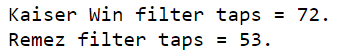

In [ ]:
fir_d.freqz_resp_list([b_k_hp,b_r_hp],[[1],[1]],'dB',fs=1)
ylim([-80,5])
title(r'Kaiser vs Equal Ripple Lowpass')
ylabel(r'Filter Gain (dB)')
xlabel(r'Frequency in kHz')
legend((r'Kaiser: %d taps' % len(b_k),r'Remez: %d taps' % len(b_r)),loc='best')
grid();

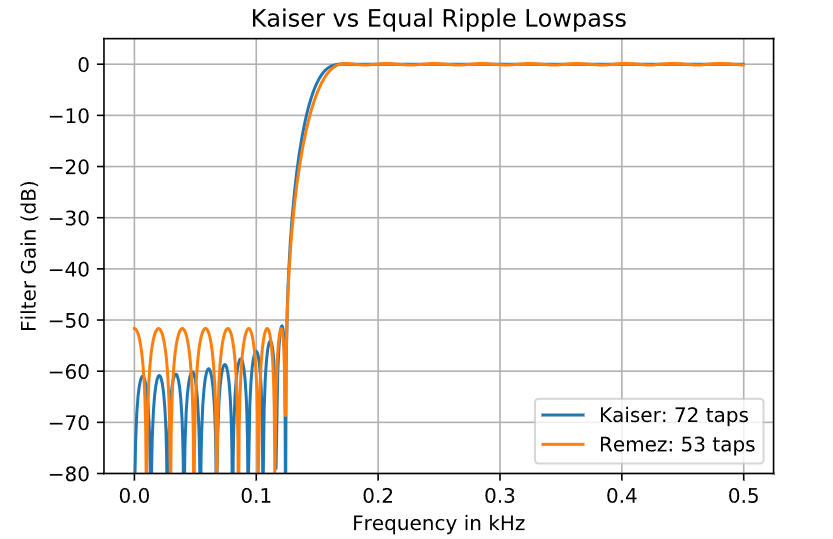

Grafik diatas menggambarkan perbandingan performa dua jenis filter lowpass: filter Kaiser dan filter Equal Ripple (Remez). Kedua filter ini ditampilkan dalam format respons frekuensi terhadap gain filter dalam satuan desibel (dB) melintasi rentang frekuensi dari 0 hingga 0.5 kHz.

**1. Kurva Biru (Kaiser 72 taps):** Menunjukkan respons frekuensi dari filter Kaiser dengan 72 taps (coefficients). Kurva ini tampak sangat mulus dan turun secara signifikan tepat di sekitar frekuensi cutoff (sekitar 0.1 kHz), menunjukkan penurunan gain yang tajam, yang menunjukkan sifat lowpass filter yang efektif dalam memblokir frekuensi tinggi.

**2. Kurva Oranye (Remez 53 taps):** Menggambarkan respons frekuensi dari filter desain Remez dengan 53 taps. Filter ini memiliki karakteristik "equal ripple" dalam passband dan stopband, yang terlihat dari gelombang-gelombang atau ripples pada kurva. Kurva ini juga menunjukkan penurunan di sekitar frekuensi cutoff, meskipun dengan beberapa oscilasi (ripples) yang lebih terlihat dibanding filter Kaiser.

In [ ]:
b_k_bp = fir_d.firwin_kaiser_bpf(7000,8000,14000,15000,50,48000)
b_r_bp = fir_d.fir_remez_bpf(7000,8000,14000,15000,0.2,50,48000)

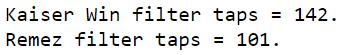

In [ ]:
fir_d.freqz_resp_list([b_k_bp,b_r_bp],[[1],[1]],'dB',fs=48)
ylim([-80,5])
title(r'Kaiser vs Equal Ripple Bandpass')
ylabel(r'Filter Gain (dB)')
xlabel(r'Frequency in kHz')
legend((r'Kaiser: %d taps' % len(b_k_bp),
        r'Remez: %d taps' % len(b_r_bp)),
       loc='lower right')
grid();

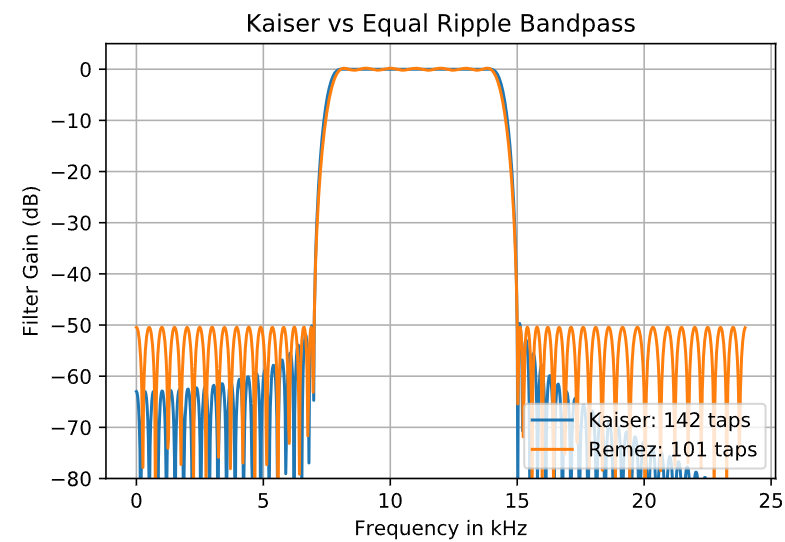

Gambar diatas adalah grafik perbandingan respons frekuensi dua jenis filter digital: filter Kaiser dan filter Remez (Equal Ripple Bandpass). Grafik ini menunjukkan keuntungan (gain) filter dalam desibel (dB) sebagai fungsi dari frekuensi dalam kilohertz (kHz).

Berikut adalah beberapa poin penting yang diilustrasikan dalam grafik:

**1. Kurva Filter:** Ada dua kurva yang ditampilkan. Kurva oranye mewakili filter Kaiser, sementara kurva biru mewakili filter Remez.

**2. Kinerja Filter di Frekuensi Berbeda:**

- Filter Gain: Di tengah grafik, keduanya menunjukkan gain tinggi sekitar 0 dB antara 5 kHz dan 10 kHz, yang menandakan bahwa keduanya mendesain untuk membiarkan frekuensi dalam rentang ini lolos tanpa banyak penurunan.

- Stopband Attenuation: Di kedua sisi frekuensi passband (5-10 kHz), kedua filter menunjukkan penurunan atau attenuasi yang signifikan, mencapai di bawah -60 dB, yang berarti kedua filter efektif memblokir frekuensi di luar rentang ini.

**3. Jumlah Taps:**

- Filter Kaiser menggunakan 142 taps.
- Filter Remez menggunakan 101 taps. Taps adalah parameter dalam desain filter yang berhubungan dengan kompleksitas dan kelancaran respons frekuensi filter.

**4. Performa Filter:** Perhatikan bahwa filter Kaiser memiliki beberapa variasi kecil (ripple) di passband, sedangkan filter Remez, sesuai dengan namanya ("Equal Ripple"), memiliki variasi yang lebih teratur dan mungkin lebih kecil di passband. Ini menandakan karakteristik desain masing-masing filter, di mana Remez mencoba meminimalkan variasi maksimal di seluruh band pass dan stop.



## Contoh Desain yang Berguna untuk Interpolasi atau Desimasi
Di sini kita mempertimbangkan desain lowpass yang perlu melewati frekuensi dari [0, 4000] Hz dengan sampling rate 96000 Hz. Skenario ini muncul saat membangun interpolator menggunakan kelas-kelas modul scikit-dsp-comm multirate_helper.py untuk meningkatkan sampling rate dari 8000 Hz menjadi 96000 Hz, atau faktor interpolasi sebesar $L = 12$. Perhatikan di bagian atas notebook ini kita juga memiliki impor

```python
import sk_dsp_comm.multirate_helper as mrh`
```

sehingga beberapa fungsionalitas dapat diakses. Untuk lebih detail tentang penggunaan multirate_helper

Mulailah dengan desain equalripple yang memiliki transition band yang terpusat pada 4000 Hz dengan ripple passband sebesar 0.5 dB dan attenuasi stopband sebesar 60 dB.0 rh

In [ ]:
b_up = fir_d.fir_remez_lpf(3300,4300,0.5,60,96000)

Remez filter taps = 196.

In [ ]:
mr_up = mrh.multirate_FIR(b_up)

FIR filter taps = 196

* Pertimbangkan konfigurasi pole-zero untuk filter berorde tinggi ini.

In [ ]:
# Take a look at the pole-zero configuration of this very
# high-order (many taps) linear phase FIR
mr_up.zplane()

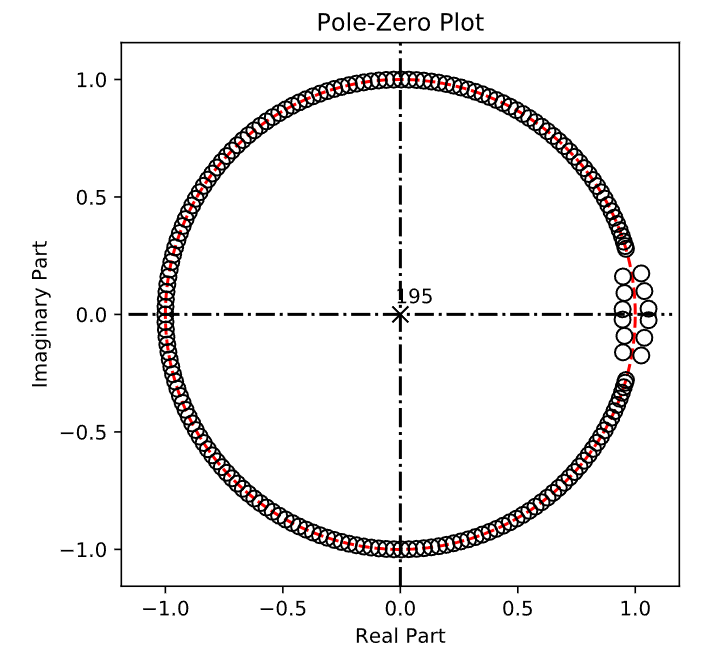

* Periksa penguatan pada jalur passband dan stopband.

Gambar diatas adalah sebuah diagram "Pole-Zero Plot," yang digunakan dalam analisis sistem kontrol dan pemrosesan sinyal. Diagram ini merupakan representasi grafis dari lokasi kutub (poles) dan nol (zeros) dari suatu fungsi transfer dalam bidang kompleks. Kutub ditandai dengan tanda 'x' dan nol dengan lingkaran kosong.

**1. Sumbu Horizontal (Real Part):** Menunjukkan bagian real dari bilangan kompleks.

**2. Sumbu Vertikal (Imaginary Part):** Menunjukkan bagian imajiner dari bilangan kompleks.

Pada plot ini, dapat dilihat bahwa:

- Sebuah kelompok kutub (tanda 'x') terletak tepat pada lingkaran unit, yang mencerminkan sistem yang mungkin osilatif atau stabil tepi (marginally stable) tergantung pada konteksnya.
- Sebuah grup nol (lingkaran kosong) terletak di dekat sumbu real antara nilai 0.8 hingga 1.0. Ini mungkin mengindikasikan frekuensi di mana output sistem akan menjadi minimum atau nol.

Lokasi dari kutub dan nol ini sangat penting dalam menentukan karakteristik respons frekuensi sistem, seperti stabilitas, resonansi, dan pelemahan.

In [ ]:
# Verify the passband and stopband gains are as expected
mr_up.freq_resp('db',96000)

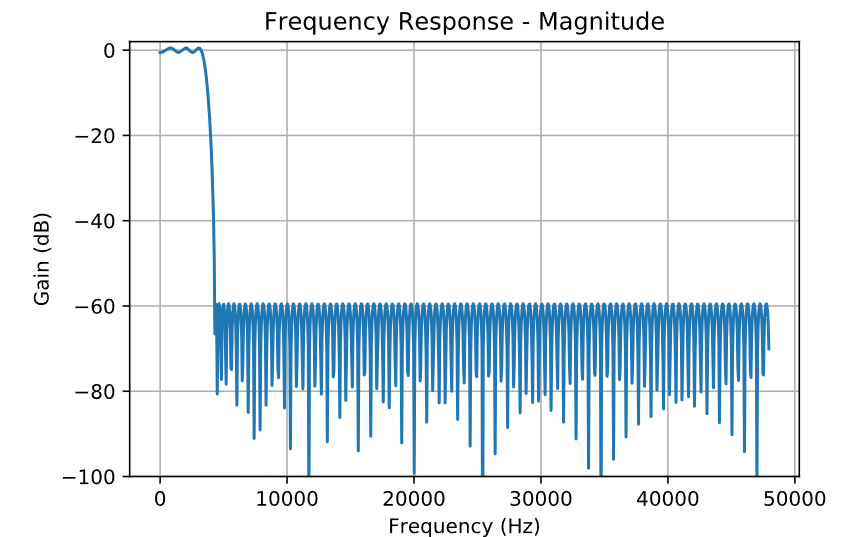

* Perhatikan bahwa delay grup adalah nilai yang diharapkan dari $(N_\text{taps} - 1)/2 = 98$ sampel.

Gambar diatas adalah grafik respons frekuensi dengan magnitudo. Grafik ini menunjukkan karakteristik dari sebuah sistem atau komponen elektronik dalam merespons berbagai frekuensi yang diberikan. Grafik ini secara khusus menampilkan dua hal utama:

**1. Frekuensi** (di sumbu horizontal: Hz) - Ini menunjukkan frekuensi sinyal input yang diterapkan, yang bergerak dari 0 Hz hingga 50.000 Hz.

**2. Gain** (di sumbu vertikal: dB) - Ini mengukur penguatan atau redaman (menjadi negatif sering menunjuk pada redaman) dari sistem pada frekuensi tertentu. Gain dinyatakan dalam desibel (dB).

Pada bagian awal grafik (dekat 0 Hz), gain sangat tinggi (hampir pada 0 dB) yang menunjukkan bahwa sistem memiliki sedikit atau tanpa redaman pada frekuensi rendah. Sesudah itu, sistem menunjukkan drop yang signifikan pada gain di bawah -40 dB, yang dimulai dari sekitar 100 Hz dan lebih rendah hingga melalui seluruh range hingga 50.000 Hz. Kemudian, grafik menunjukkan fluktuasi yang konsisten dan rendah dari gain, berada di kisaran bawah -60 dB hingga -80 dB untuk sebagian besar range frekuensi tinggi, menunjukkan redaman yang tinggi pada frekuensi-frekuensi tersebut.

In [ ]:
(len(b_up-1))/2

98.0

In [ ]:
# Verify that the FIR design has constant group delay (N_taps - 1)/2 samples
mr_up.freq_resp('groupdelay_s',96000,[0,100])

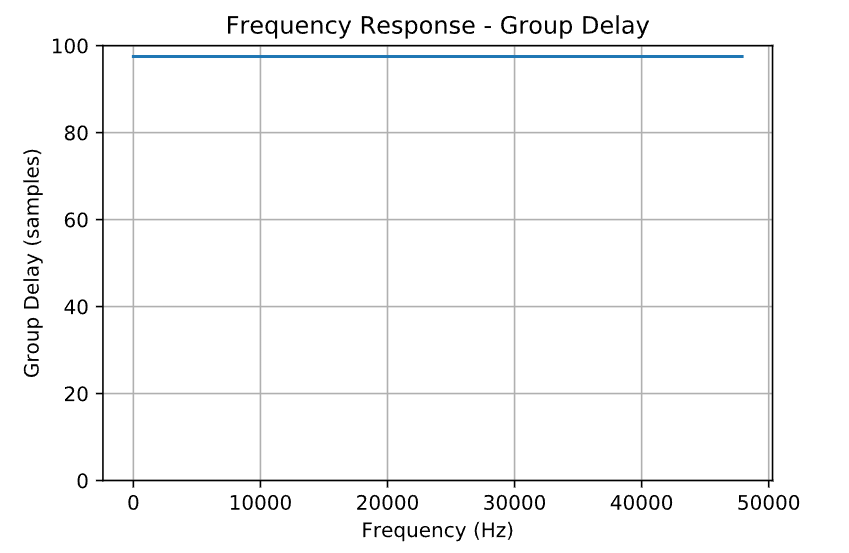

Objek mr_up sekarang dapat digunakan untuk interpolasi atau desimasi dengan faktor perubahan laju sebesar 12.

Gambar diatas menampilkan grafik yang mengilustrasikan "Group Delay" sebagai fungsi frekuensi (dalam Hz). Grafik ini adalah kosong, yang menunjukkan tidak ada data yang diplot atau tingkat tunda kelompok yang diwakili belum ditentukan untuk setiap frekuensi.

Grafik ini digunakan dalam analisis sistem elektronik atau pemrosesan sinyal, seperti dalam bidang akustik atau telekomunikasi, untuk menunjukkan bagaimana waktu tunda kelompok berubah seiring dengan frekuensi. Grup delay adalah suatu ukuran tentang seberapa cepat atau lambat sinyal melewati sistem pada frekuensi tertentu. Pada sumbu vertikal, grup delay dinyatakan dalam "Samples" dan pada sumbu horizontal frekuensi disajikan dalam Hertz (Hz). Jarak antar titik sumbu horizontal adalah 10,000 Hz dan sumbu vertikal terlihat dibagi menjadi interval tetapi skala tidak terlihat secara spesifik.

## Desain IIR Berdasarkan Transformasi Bilinear
Ada beberapa cara untuk merancang filter IIR berdasarkan persyaratan respons amplitudo. Ketika keinginan adalah agar aproksimasi filter mengikuti prototipe analog seperti Butterworth, Chebychev, dll., menggunakan transformasi bilinear. Fungsi signal.iirdesign() yang dijelaskan di atas melakukan hal ini dengan tepat.

Dalam contoh di bawah ini, kita pertimbangkan persyaratan respons amplitudo lowpass dan melihat bagaimana urutan filter berubah saat kita memilih prototipe analog yang berbeda.

### Contoh: Perbandingan Desain Lowpass
Persyaratan respons amplitudo lowpass dengan $f_s = 48$ kHz adalah:
1. $f_\text{pass} = 5$ kHz
2. $f_\text{stop} = 8$ kHz
3. Ripple passband sebesar 0.5 dB
4. Attenuasi stopband sebesar 60 dB

Rancang empat filter untuk memenuhi persyaratan yang sama: butter, cheby1, cheby2, dan ellip:

In [ ]:
fs = 48000
f_pass = 5000
f_stop = 8000
b_but,a_but,sos_but = iir_d.IIR_lpf(f_pass,f_stop,0.5,60,fs,'butter')
b_cheb1,a_cheb1,sos_cheb1 = iir_d.IIR_lpf(f_pass,f_stop,0.5,60,fs,'cheby1')
b_cheb2,a_cheb2,sos_cheb2 = iir_d.IIR_lpf(f_pass,f_stop,0.5,60,fs,'cheby2')
b_elli,a_elli,sos_elli = iir_d.IIR_lpf(f_pass,f_stop,0.5,60,fs,'ellip')

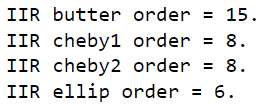

#### Perbandingan Respons Frekuensi
Di sini kita membandingkan respons magnitudo dalam dB menggunakan bentuk`sos` dari masing-masing filter sebagai input. Filter eliptikal adalah yang paling efisien, dan bahkan berhasil melebihi persyaratan stopband dengan mencapai kurang dari 8 kHz.

In [ ]:
iir_d.freqz_resp_cas_list([sos_but,sos_cheb1,sos_cheb2,sos_elli],'dB',fs=48)
ylim([-80,5])
title(r'IIR Lowpass Compare')
ylabel(r'Filter Gain (dB)')
xlabel(r'Frequency in kHz')
legend((r'Butter order: %d' % (len(a_but)-1),
        r'Cheby1 order: %d' % (len(a_cheb1)-1),
        r'Cheby2 order: %d' % (len(a_cheb2)-1),
        r'Elliptic order: %d' % (len(a_elli)-1)),loc='best')
grid();

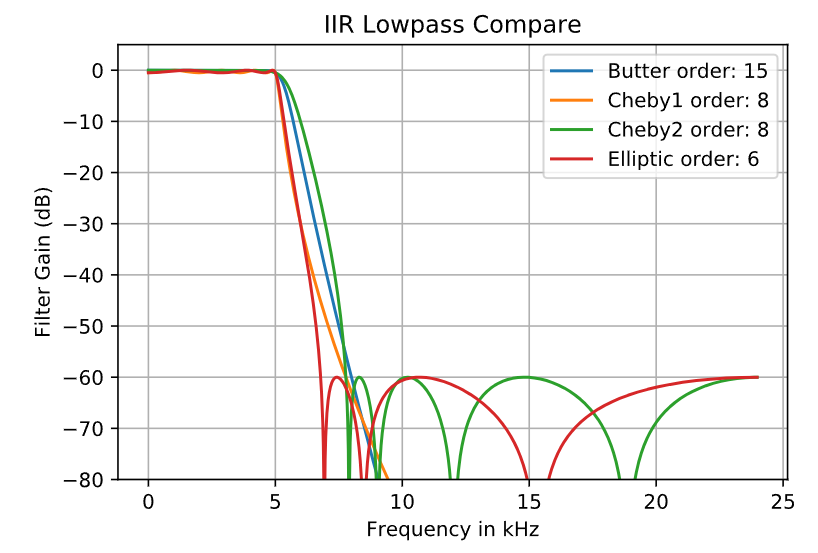

Grafik diatas menunjukkan perbandingan karakteristik filter lowpass IIR (Infinite Impulse Response) dari beberapa tipe filter: Butterworth, Chebyshev tipe 1 (Cheby1), Chebyshev tipe 2 (Cheby2), dan Elliptic. Setiap kurva mewakili respons frekuensi dalam desibel (dB) terhadap rentang frekuensi dari 0 hingga 25 kiloHertz (kHz).

- Kurva biru (Butterworth order 15): Ini menunjukkan respon filter Butterworth dengan orde 15. Filter Butterworth terkenal dengan respons frekuensi yang halus di dalam pita lewat (passband) dan rolloff yang relatif lambat di pita tolak (stopband).

- Kurva oranye (Cheby1 order: 8): Ini adalah filter Chebyshev tipe 1 dengan orde 8. Filter Chebyshev tipe 1 menampilkan ripples dalam passband, tetapi memiliki keuntungan dalam mendapatkan rolloff yang lebih cepat dibandingkan dengan Butterworth.

- Kurva hijau (Cheby2 order: 8): Ini menggambarkan filter Chebyshev tipe 2 dengan orde yang sama, 8. Berbeda dengan tipe 1, filter tipe 2 memiliki ripples di stopband tetapi passband yang lebih halus.

- Kurva merah (Elliptic order 6): Ini adalah filter Elliptic dengan orde 6. Filter Elliptic menawarkan rolloff tercepat diantara tipe-tipe yang ditampilkan dan memiliki ripples tanto di passband maupun stopband.

Selanjutnya, plot konfigurasi pole-zero dari desain butterworth saja. Di sini kita menggunakan versi khusus dari ss.zplane yang berfungsi dengan array 2D sos.

In [ ]:
iir_d.sos_zplane(sos_but)

(15, 15)

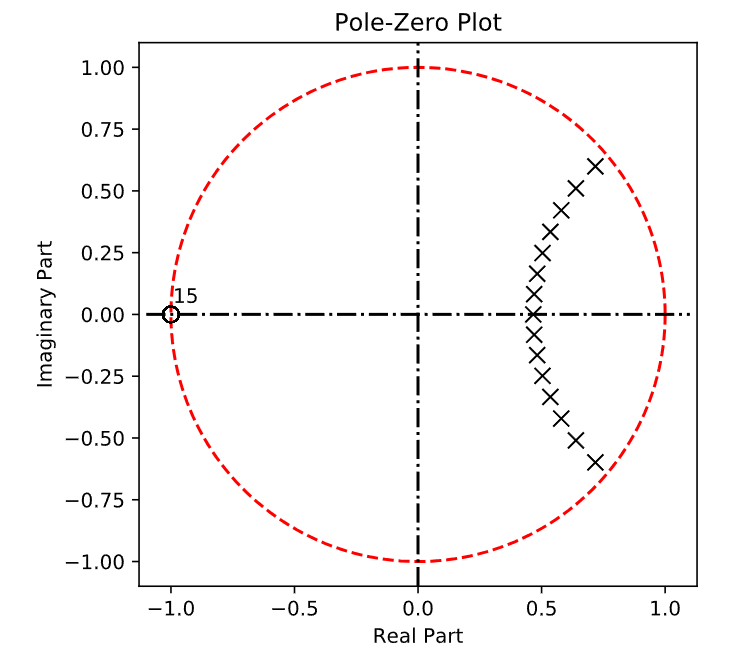

Gambar diatas adalah plot kutub-nol (pole-zero plot) yang sering digunakan dalam analisis sistem kontrol atau sistem pemrosesan sinyal. Plot ini mendemonstrasikan posisi kutub (poles) dan nol (zeros) dari suatu fungsi transfer di bidang kompleks. Elemen-elemen pada plot ini adalah sebagai berikut:

- **Sumbu horizontal (Real Part):** Menunjukkan bagian real dari bilangan kompleks.
- **Sumbu vertikal (Imaginary Part):** Menunjukkan bagian imajiner dari bilangan kompleks.
- **Lingkaran:** Biasanya digunakan untuk menunjukkan batasan stabilitas sistem. Dalam konteks sistem stabilitas, kutub yang berada di dalam lingkaran menandakan sistem stabil, sedangkan kutub yang berada di luar lingkaran menandakan sistem yang tidak stabil.
- **Tanda 'X' (Cross):** Melambangkan kutub dari fungsi transfer.
- **Tanda 'O' (Circle):** Melambangkan nol dari fungsi transfer.

Dalam gambar ditampilkan, semua kutub ('X') terletak di sumbu real, yang menunjukkan bahwa mereka adalah real dan tidak memiliki komponen imajiner. Hanya ada satu titik nol (tidak ditunjukkan pada gambar), yang berarti tidak ada pengaruh khusus yang membatalkan efek kutub dalam respons frekuensi sistem.

Catatan bahwa dua plot di atas juga dapat diperoleh menggunakan bentuk fungsi transfer melalui `iir_d.freqz_resp_list([b],[a],'dB',fs=48)` dan `ss.zplane(b,a)` masing-masing. Bentuk `sos` akan memberikan hasil yang lebih akurat, karena kurang sensitif terhadap kuantisasi koefisien. Hal ini terutama benar untuk plot pole-zero, karena merooting polinomial derajat ke-15 jauh lebih rentan terhadap kesalahan dibandingkan merooting polinomial kuadrat sederhana.

Untuk Butterworth orde ke-15, transformasi bilinear memetakan 15 nol domain-s ke tak hingga menjadi $z=-1$. Jika Anda menggunakan `sk_dsp_comm.sigsys.zplane()`, Anda akan menemukan bahwa 15 nol berada dalam lingkaran rapat di sekitar $z=-1$, menunjukkan kesalahan merooting polinomial. Demikian pula, respons frekuensi akan lebih akurat.

Pemfilteran sinyal dari array `x` dilakukan menggunakan desain filter dengan fungsi dari `scipy.signal`:

1. Untuk bentuk fungsi transfer `y = signal.lfilter(b,a,x)`
2. Untuk bentuk sos `y = signal.sosfilt(sos,x)`sos,x)`

## Desain Filter Half-Band untuk Melewati hingga $W/2$ saat $f_s = 8$ kHz
Di sini kita mempertimbangkan desain lowpass yang perlu melewati frekuensi hingga $f_s/4$. Secara khusus ketika $f_s = 8000$ Hz, passband filter menjadi [0, 2000] Hz. Setelah koefisien ditemukan, sebuah objek`mrh.multirat` diciptakan untuk memungkinkan studi lebih lanjut tentang filter, dan akhirnya menerapkan filtering dari sinyal white noise.

Mulailah dengan desain eliptikal yang memiliki transition band yang terpusat pada 2000 Hz dengan ripple passband sebesar 0.5 dB dan attenuasi stopband sebesar 80 dB. Bandwidth transisi diatur menjadi 100 Hz, dengan 50 Hz di setiap sisi dari 2000 Hz.

In [ ]:
# Elliptic IIR Lowpass
b_lp,a_lp,sos_lp = iir_d.IIR_lpf(1950,2050,0.5,80,8000.,'ellip')
mr_lp = mrh.multirate_IIR(sos_lp)

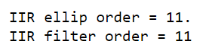

In [ ]:
mr_lp.freq_resp('db',8000)

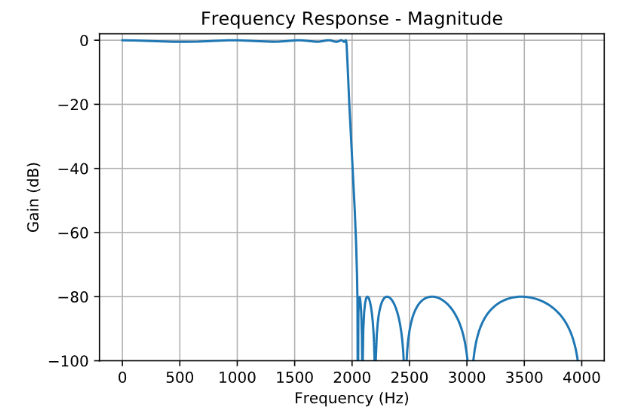

Lewatkan white noise Gaussian dengan varians $\sigma_x^2 = 1$ melalui filter. Gunakan banyak sampel sehingga estimasi spektral dapat membentuk dengan akurat $S_y(f) = \sigma_x^2\cdot |H(e^{j2\pi f/f_s})|^2 = |H(e^{j2\pi f/f_s})|^2$.

Gambar diatas menampilkan grafik tanggapan frekuensi dalam bentuk magnitude untuk sebuah sistem atau komponen elektronik. Grafik ini diplot dengan Frekuensi di sumbu horizontal yang diukur dalam Hertz (Hz) dan Gain yang diukur dalam desibel (dB) pada sumbu vertikal.

Di gambar ini, kita dapat melihat beberapa karakteristik kunci:

1. **Pita Stop** (Stop Band): Terdapat dua area jelas di mana gain turun secara signifikan, yang pertama mulai sekitar frekuensi 2000 Hz hingga sedikit di atas 2500 Hz, dan yang kedua dimulai sekitar 3000 Hz hingga hampir 3500 Hz. Ini menunjukkan bahwa sistem atau filter tersebut memiliki pita penolakan di frekuensi tersebut, efektif mematikan atau sangat meredam sinyal pada rentang frekuensi tersebut.

2. **Pita Lewat** (Pass Band): Grafik menunjukkan area dengan gain yang sangat tinggi (mendekati 0 dB) dari awal hingga sekitar 2000 Hz yang menunjukkan bahwa pada frekuensi ini, sinyal akan dilewatkan dengan sedikit atau tanpa atenuasi.

3. **Peningkatan Denyut** (Peaking): Grafik menunjukkan tingkat yang meruncing atau "peak" pada sekitar 2750 Hz yang mana gain-nya naik kembali sebelum turun lagi, yang umumnya merupakan indikator karakteristik resonansi atau filter yang sengaja dirancang untuk memperkuat frekuensi tersebut.

In [ ]:
x = randn(1000000)
y = mr_lp.filter(x)
psd(x,2**10,8000);
psd(y,2**10,8000);
title(r'Filtering White Noise Having $\sigma_x^2 = 1$')
legend(('Input PSD','Output PSD'),loc='best')
ylim([-130,-30])

(-130, -30)

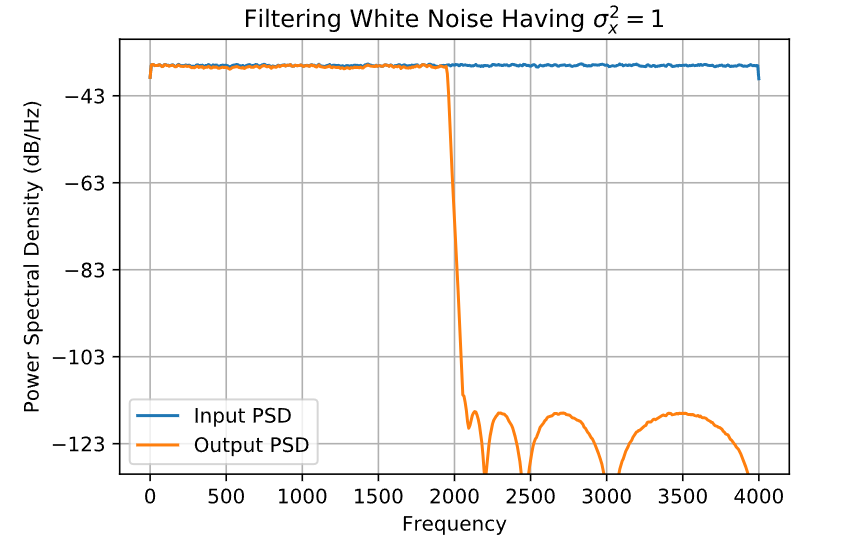

In [ ]:
fs = 8000
print('Expected PSD of %2.3f dB/Hz' % (0-10*log10(fs),))

Expected PSD of -39.031 dB/Hz

## Desain Bandpass Respons Amplitudo
Di sini kita pertimbangkan desain bandpass FIR dan IIR untuk digunakan dalam demodulator SSB untuk menghapus sinyal saluran sebelah yang mungkin berada di kedua sisi dari sebuah pita frekuensi yang berjalan dari 23 kHz hingga 24 kHz.

In [ ]:
b_rec_bpf1 = fir_d.fir_remez_bpf(23000,24000,28000,29000,0.5,70,96000,8)
fir_d.freqz_resp_list([b_rec_bpf1],[1],mode='dB',fs=96000)
ylim([-80, 5])
grid();

Remez filter taps = 225.

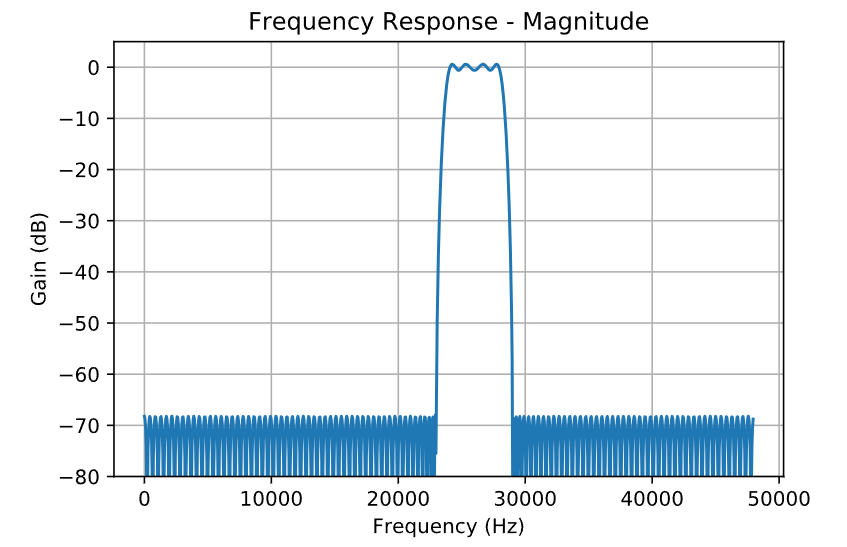

Delay grup datar (konstan) karena desain memiliki fase linear.

Gambar ini menunjukkan "Frequency Response - Magnitude" atau Respon Frekuensi dalam desibel (dB) terhadap Frekuensi dalam Hertz (Hz).

Berikut adalah penjelasan dari grafik tersebut:

1. **Sumbu Y (Gain dB):**

- Sumbu vertikal (Y-axis) menunjukkan gain atau penguatan dalam desibel (dB). Nilai gain ini menunjukkan seberapa banyak sinyal diperkuat pada berbagai frekuensi.

2. **Sumbu X (Frequency Hz):**

- Sumbu horizontal (X-axis) menunjukkan frekuensi dalam Hertz (Hz). Frekuensi ini berkisar dari 0 Hz hingga 50,000 Hz dalam grafik ini.

3. **Respon Frequency:**

- Grafik ini menunjukkan bahwa filter (atau sistem) memiliki respon frekuensi dari sekitar 20,000 Hz hingga 25,000 Hz dimana gain mendekati 0 dB, seolah-olah sinyal melewati tanpa banyak penguatan atau pelemahan.
- Di luar rentang frekuensi ini (baik di bawah 20,000 Hz maupun di atas 25,000 Hz), gain turun drastis mendekati -80 dB. Ini berarti bahwa sinyal pada frekuensi-frekuensi tersebut sangat dilemahkan.
Jenis Filter:

Berdasarkan grafik ini, bisa disimpulkan bahwa filter ini adalah sebuah band-pass filter, yang melewatkan frekuensi antara 20,000 Hz hingga 25,000 Hz sambil melemahkan frekuensi di luar rentang tersebut.
Secara ringkas, grafik menunjukan bahwa filter ini didesain untuk memperbolehkan sinyal dalam rentang frekuensi 20,000 Hz hingga 25,000 Hz sementara melemahkan sinyal di luar rentang tersebut secara signifikan.

In [ ]:
b_rec_bpf1 = fir_d.fir_remez_bpf(23000,24000,28000,29000,0.5,70,96000,8)
fir_d.freqz_resp_list([b_rec_bpf1],[1],mode='groupdelay_s',fs=96000)
grid();

Remez filter taps = 225.

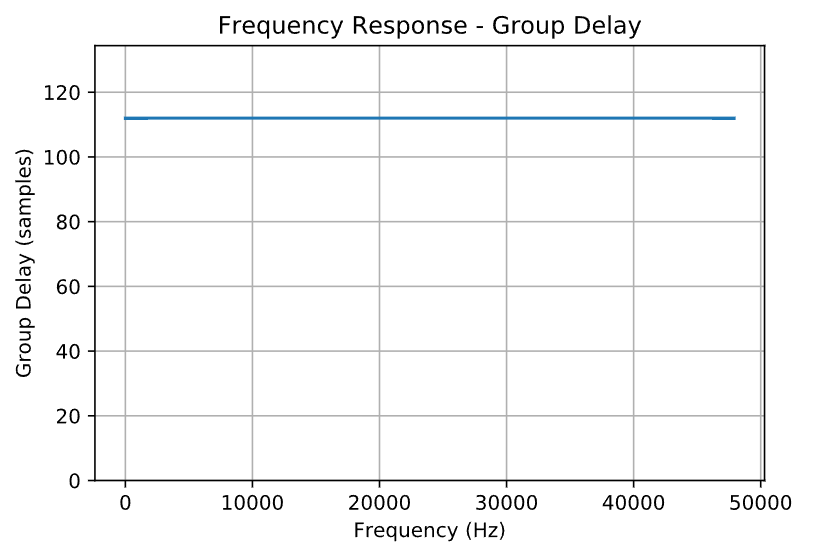

Gambar diatas menunjukkan diagram tanggapan frekuensi, khususnya tanggapan kelompok tunda (group delay) pada rentang frekuensi dari 0 hingga 50.000 Hz. Berikut adalah penjelasan rinci mengenai elemen-elemen dalam grafik ini:

1. **Judul Grafik:** "Frequency Response - Group Delay"

- Menunjukkan bahwa grafik ini memvisualisasikan tanggapan frekuensi dalam bentuk kelompok tunda.

2. **Sumbu Horizontal (X-Axis):**
"Frequency (Hz)"

- Sumbu ini mewakili frekuensi dalam satuan Hertz (Hz) dengan rentang dari 0 hingga 50.000 Hz.

3. **Sumbu Vertikal (Y-Axis):**
"Group Delay (samples)"

- Sumbu ini mewakili kelompok tunda dalam satuan sampel.

4. **Data Plot:**

- Data yang ditampilkan adalah garis horizontal konstan pada nilai 120 sampel sepanjang seluruh rentang frekuensi dari 0 hingga 50.000 Hz.

5. **Interpretasi:**

- Tanggapan kelompok tunda yang konstan pada nilai 120 sampel untuk seluruh frekuensi yang diukur menunjukkan bahwa perangkat atau sistem yang diuji memiliki tunda kelompok yang seragam, tanpa variasi dengan perubahan frekuensi dalam rentang yang ditampilkan.

Kesimpulannya, grafik ini mengindikasikan bahwa kelompok tunda tetap stabil di angka 120 sampel untuk semua frekuensi hingga 50.000 Hz, yang merupakan karakteristik penting dalam menganalisis perilaku sistem dalam domain waktu dan frekuensi.

Bandingkan desain FIR dengan desain eliptikal:

In [ ]:
b_rec_bpf2,a_rec_bpf2,sos_rec_bpf2 = iir_d.IIR_bpf(23000,24000,28000,29000,
                                                   0.5,70,96000,'ellip')
with np.errstate(divide='ignore'):
    iir_d.freqz_resp_cas_list([sos_rec_bpf2],mode='dB',fs=96000)
ylim([-80, 5])
grid();

IIR ellip order = 14.

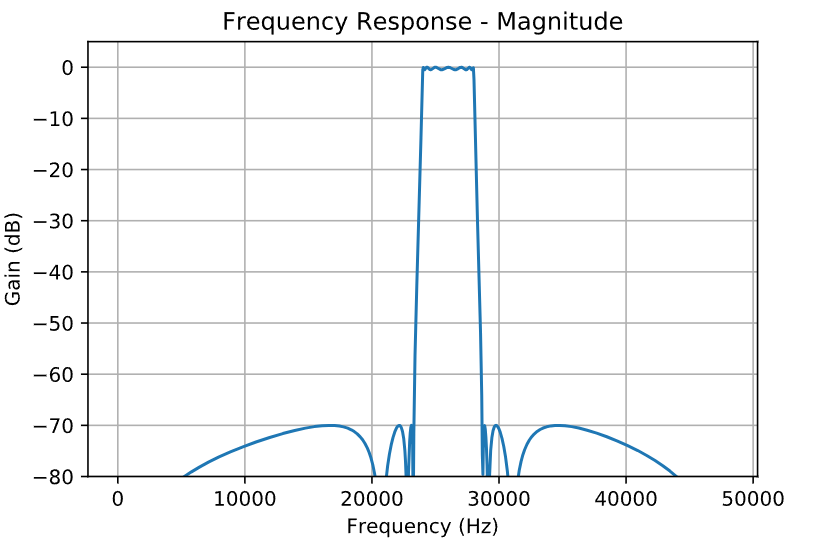

Gambar diatas adalah grafik respon frekuensi dalam domain magnitudo, yang menunjukkan bagaimana sistem atau filter merespons berbagai frekuensi input. Berikut adalah penjelasan rincinya:

1. **Sumbu Horizontal (X-Axis):** Menunjukkan frekuensi dalam Hertz (Hz), berkisar dari 0 hingga 50000 Hz.

2. **Sumbu Vertikal (Y-Axis):** Menunjukkan gain (penguatan) dalam desibel (dB), berkisar dari -80 dB hingga 10 dB.

3. **Bentuk Grafik:**

- **Daerah Passband:** Salah satu penanda utama dalam grafik ini adalah daerah di sekitar 30000 Hz, di mana gain mendekati 0 dB. Ini menunjukkan frekuensi yang diteruskan hampir tanpa atenuasi (pengurangan signal).
- **Daerah Stopband:** Terdapat daerah di sekitar frekuensi yang jauh dari 30000 Hz (di atas dan di bawahnya) di mana gain mendekati -80 dB, menunjukkan bahwa frekuensi-frekuensi tersebut sangat ditekan atau tidak diteruskan melalui filter.

4. **Bandwith dan Peralihan:** Pada grafik ini terlihat bahwa filter memiliki bandwidth tertentu di sekitar 30000 Hz di mana sinyal diteruskan. Di luar bandwidth ini, ada transisi cepat menurun menuju stopband di mana gain sangat rendah.

Elliptical orde tinggi ini memiliki respons amplitudo yang bagus dan rapat untuk jumlah koefisien minimal, tetapi delay grupnya buruk:

In [ ]:
with np.errstate(divide='ignore', invalid='ignore'): #manage singularity warnings
    iir_d.freqz_resp_cas_list([sos_rec_bpf2],mode='groupdelay_s',fs=96000)
#ylim([-80, 5])
grid();

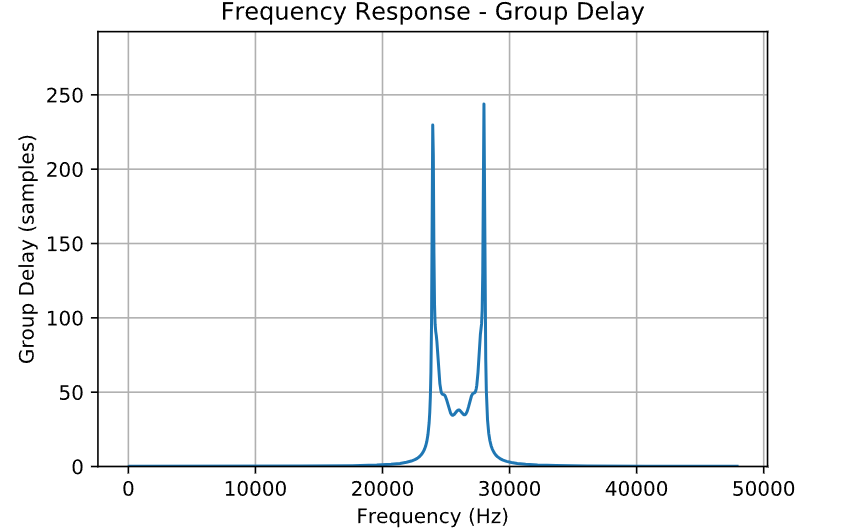

Gambar diatas adalah grafik yang menunjukkan respons frekuensi untuk delay grup dari suatu sistem atau filter. Berikut adalah penjelasan rinci tentang grafik tersebut:

1. **Judul Grafik:**

- Judul di bagian atas grafik adalah "Frequency Response - Group Delay", yang menunjukkan bahwa grafik ini menggambarkan respons frekuensi dari penundaan grup.

2. **Sumbu X:**

- Sumbu X mewakili frekuensi dalam satuan Hertz (Hz), berkisar dari 0 Hz hingga 50,000 Hz.

3. **Sumbu Y:**

- Sumbu Y mewakili penundaan grup dalam satuan sampel (samples).

4. **Kurva:**

- Kurva pada grafik ini menunjukkan bagaimana penundaan grup bervariasi seiring dengan perubahan frekuensi.
Terlihat bahwa ada dua puncak utama sekitar frekuensi 25000 Hz di mana penundaan grup mencapai nilai maksimum lebih dari 250 sampel.